In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

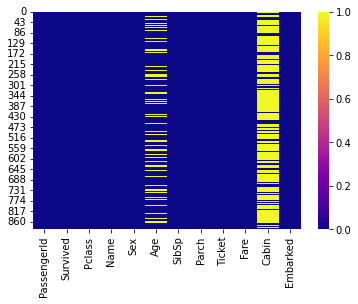

In [5]:
sns.heatmap(df.isnull(), cmap = 'plasma')

In [6]:
df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

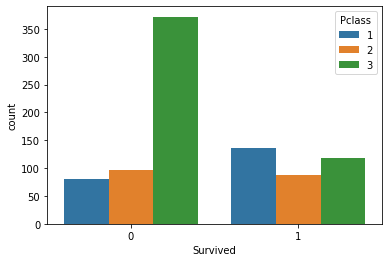

In [8]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
df.isnull().sum()*100/len(df)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64

<AxesSubplot:>

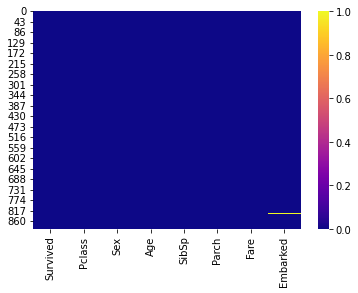

In [11]:
sns.heatmap(df.isnull(), cmap = 'plasma')

In [12]:
random_sample = df['Embarked'].dropna().sample(df['Embarked'].isnull().sum(), random_state = 0)
random_sample.index = df[df['Embarked'].isnull()].index
df.loc[df['Embarked'].isnull(), 'Embarked'] = random_sample

In [13]:
df.isnull().sum()*100/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [14]:
gender = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)
pclass = df['Pclass']
surv = df['Survived']
df.drop(['Sex','Embarked','Pclass','Survived'], axis = 1, inplace = True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   SibSp   891 non-null    int64  
 2   Parch   891 non-null    int64  
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [16]:
df = pd.concat([df, gender, embark, pclass, surv], axis = 1)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   male      891 non-null    uint8  
 5   Q         891 non-null    uint8  
 6   S         891 non-null    uint8  
 7   Pclass    891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [18]:
df

,Age,SibSp,Parch,Fare,male,Q,S,Pclass,Survived
0,22.0,1,0,7.2500,1,0,1,3,0
1,38.0,1,0,71.2833,0,0,0,1,1
2,26.0,0,0,7.9250,0,0,1,3,1
3,35.0,1,0,53.1000,0,0,1,1,1
4,35.0,0,0,8.0500,1,0,1,3,0
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,2,0
887,19.0,0,0,30.0000,0,0,1,1,1
888,28.0,1,2,23.4500,0,0,1,3,0
889,26.0,0,0,30.0000,1,0,0,1,1


In [19]:
def pclasshandle(p):
    p -= 1
    return p
df.Pclass = df.Pclass.apply(pclasshandle)

In [20]:
df

,Age,SibSp,Parch,Fare,male,Q,S,Pclass,Survived
0,22.0,1,0,7.2500,1,0,1,2,0
1,38.0,1,0,71.2833,0,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,2,1
3,35.0,1,0,53.1000,0,0,1,0,1
4,35.0,0,0,8.0500,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,1
888,28.0,1,2,23.4500,0,0,1,2,0
889,26.0,0,0,30.0000,1,0,0,0,1


In [33]:
df_copy = pd.read_csv("titanic.csv")

In [7]:
class TitanicFeature:
    def __init__(self, featureName="feature"):
        self.name = featureName

    def processFeature(self, df):
        # Edited Feature
        # imports
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        import warnings
        warnings.filterwarnings('ignore')
        
        df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
        
        df['Age'] = df['Age'].fillna(df['Age'].median())
        
        random_sample = df['Embarked'].dropna().sample(df['Embarked'].isnull().sum(), random_state = 0)
        random_sample.index = df[df['Embarked'].isnull()].index
        df.loc[df['Embarked'].isnull(), 'Embarked'] = random_sample
        
        gender = pd.get_dummies(df['Sex'], drop_first = True)
        embark = pd.get_dummies(df['Embarked'], drop_first = True)
        pclass = df['Pclass']
        surv = df['Survived']
        df.drop(['Sex','Embarked','Pclass','Survived'], axis = 1, inplace = True)
        
        
        df = pd.concat([df, gender, embark, pclass, surv], axis = 1)
        
        
        def pclasshandle(p):
            p -= 1
            return p
        df.Pclass = df.Pclass.apply(pclasshandle)
        
        return df

In [8]:
obj = TitanicFeature()

In [3]:
class FeatureClass:
    def __init__(self, featureName="feature"):
        self.name = featureName

    def processFeature(self, df):
        # imports
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        import warnings
        warnings.filterwarnings('ignore')
        
        df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
        
        df['Age'] = df['Age'].fillna(df['Age'].median())
        
        random_sample = df['Embarked'].dropna().sample(df['Embarked'].isnull().sum(), random_state = 0)
        random_sample.index = df[df['Embarked'].isnull()].index
        df.loc[df['Embarked'].isnull(), 'Embarked'] = random_sample
        
        gender = pd.get_dummies(df['Sex'], drop_first = True)
        embark = pd.get_dummies(df['Embarked'], drop_first = True)
        pclass = df['Pclass']
        surv = df['Survived']
        df.drop(['Sex','Embarked','Pclass','Survived'], axis = 1, inplace = True)
        
        
        df = pd.concat([df, gender, embark, pclass, surv], axis = 1)
        
        
        def pclasshandle(p):
            p -= 1
            return p
        df.Pclass = df.Pclass.apply(pclasshandle)
        
        return df

In [4]:
obj = FeatureClass()
obj.processFeature(df)

,Age,SibSp,Parch,Fare,male,Q,S,Pclass,Survived
0,22.0,1,0,7.2500,1,0,1,2,0
1,38.0,1,0,71.2833,0,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,2,1
3,35.0,1,0,53.1000,0,0,1,0,1
4,35.0,0,0,8.0500,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,0,1,1,0
887,19.0,0,0,30.0000,0,0,1,0,1
888,28.0,1,2,23.4500,0,0,1,2,0
889,26.0,0,0,30.0000,1,0,0,0,1


In [5]:
class DemoFeature:
    def __init__(self, featureName="feature"):
        self.name = featureName

    def processFeature(self, df):
        # imports
        # edited 
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        import warnings
        warnings.filterwarnings('ignore')
        
        df.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
        
        df['Age'] = df['Age'].fillna(df['Age'].median())
        
        random_sample = df['Embarked'].dropna().sample(df['Embarked'].isnull().sum(), random_state = 0)
        random_sample.index = df[df['Embarked'].isnull()].index
        df.loc[df['Embarked'].isnull(), 'Embarked'] = random_sample
        
        gender = pd.get_dummies(df['Sex'], drop_first = True)
        embark = pd.get_dummies(df['Embarked'], drop_first = True)
        pclass = df['Pclass']
        surv = df['Survived']
        df.drop(['Sex','Embarked','Pclass','Survived'], axis = 1, inplace = True)
        
        
        df = pd.concat([df, gender, embark, pclass, surv], axis = 1)
        
        
        def pclasshandle(p):
            p -= 1
            return p
        df.Pclass = df.Pclass.apply(pclasshandle)
        
        return df

In [6]:
obj = DemoFeature()